[View in Colaboratory](https://colab.research.google.com/github/constantinembufung/Movie-Reviews-with-Deep-Learning-Tensorflow/blob/master/Movies_reviews_with_Deep_learning.ipynb)

# Movie reviews Deep learning analysis with tensorflow

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 4s 0us/step


Train_data, test_data are lists of reviews whereas test_labels and train_labels are list of 0s and 1s where O stands for negative, and 1 stands for positive

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train_labels[1])

0


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value)  in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


# Preparing the data
our data is a list so we can't feed th elist of . integers into a neural network so we will use one-hot to encode the data into a binary matrix
Encoding the integer sequences into a binqry matrix

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [15]:
#We should also vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

print(y_train[0])

1.0


Now the data is ready to be fed into a neural network

In [0]:
#validating your model approad
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Building your neural network model
we are going to use relu activations functions and rmsprop as our loss function 

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ))) #first layer
model.add(layers.Dense(16, activation='relu')) # second deep hidden layer
model.add(layers.Dense(1, activation='sigmoid')) 


# Training your model

In [22]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc']
            )

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.5367 - acc: 0.7767 - val_loss: 0.3999 - val_acc: 0.8676
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3210 - acc: 0.8989 - val_loss: 0.3266 - val_acc: 0.8729
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2352 - acc: 0.9239 - val_loss: 0.2850 - val_acc: 0.8867
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1846 - acc: 0.9400 - val_loss: 0.2734 - val_acc: 0.8915
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1530 - acc: 0.9509 - val_loss: 0.2992 - val_acc: 0.8815
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1241 - acc: 0.9615 - val_loss: 0.2866 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1074 - acc: 0.9668 - val_loss: 0.3031 - 

15000/15000 [==============================] - 2s 111us/step - loss: 0.0711 - acc: 0.9815 - val_loss: 0.3390 - val_acc: 0.8809
Epoch 10/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0611 - acc: 0.9847 - val_loss: 0.3817 - val_acc: 0.8758
Epoch 11/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0483 - acc: 0.9896 - val_loss: 0.3957 - val_acc: 0.8744
Epoch 12/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0397 - acc: 0.9919 - val_loss: 0.4155 - val_acc: 0.8738
Epoch 13/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0347 - acc: 0.9928 - val_loss: 0.4520 - val_acc: 0.8752
Epoch 14/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0256 - acc: 0.9949 - val_loss: 0.4873 - val_acc: 0.8725
Epoch 15/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0194 - acc: 0.9969 - val_loss: 0.5323 - val_acc: 0.8637
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 112us/step - loss: 0.0106 - acc: 0.9987 - val_loss: 0.6150 - val_acc: 0.8621
Epoch 19/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0079 - acc: 0.9993 - val_loss: 0.6336 - val_acc: 0.8663
Epoch 20/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0047 - acc: 0.9998 - val_loss: 0.6675 - val_acc: 0.8649


In [23]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


the model.fit() returns a history object which has 4 entries we are going to use matplot lib to visualize the training and validation loss side by side

# Plotting the training and validation loss

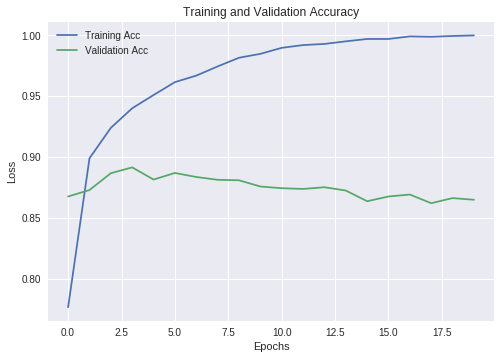

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper left')
plt.show()

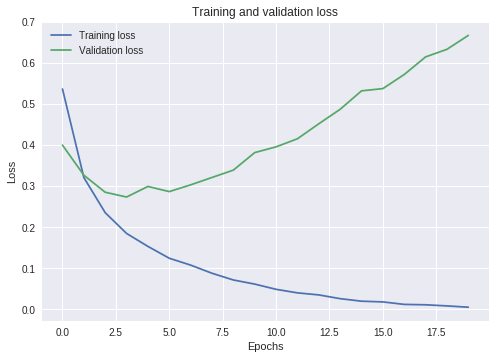

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. 
That’s what you would expect when running gradientdescent
optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. 

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 68us/step


In [35]:
print('Model Accuracy :', test_acc*100.)

Model Accuracy : 85.016


Our model accuracy is 85.016 percent, but we will need to retrained the model for only 4 epochs

# Retraining a model from scratch for 4 epochs

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.4580 - acc: 0.8139
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2634 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2011 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 74us/step


In [40]:
print(results)

[0.2962084628868103, 0.88364]


This fairly naive approach achieves an accuracy of 88%.  With state-of-the-art
approaches, you should be able to get close to 95%.

# Using a trained network to generate predictions on new data
After having trained a network, you’ll want to use it in a practical setting

In [41]:
model.predict(x_test)

array([[0.20613885],
       [0.9995297 ],
       [0.93887407],
       ...,
       [0.1339466 ],
       [0.09360309],
       [0.69546723]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4).